# DESCRIPTIVE ANALYSIS

In [1]:
#importing the necessary modules for data manipulation and visualization

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 as psy

# display plots in the notebook itself
%matplotlib inline

In [6]:
#importing my dataframe to JUPYTER NOTEBOOK

df=pd.read_csv(r"C:\Users\HP\Documents\PROJECT\Cities' Pop\cities.csv")


In [7]:
#Rows by Columns
df.shape

(221, 6)

In [8]:
#Confirming my dataset
df

,continent,country_id,country_name,city_id,city_name,population
0,Africa,id_0,Country 0,cid0,City 0,940371
1,Africa,id_1,Country 1,cid0,City 0,1170319
2,Africa,id_1,Country 1,cid1,City 1,1580651
3,Africa,id_1,Country 1,cid2,City 2,1360412
4,Africa,id_1,Country 1,cid3,City 3,1390719
...,...,...,...,...,...,...
216,Africa,id_38,Country 38,cid0,City 0,1672547
217,Africa,id_38,Country 38,cid1,City 1,847495
218,Africa,id_39,Country 39,cid0,City 0,1359754
219,Africa,id_39,Country 39,cid1,City 1,1563952


In [6]:
#To give a summary of mean,median,min and max of the cities' population 
df.describe()

,population
count,2.210000e+02
mean,7.656255e+06
std,5.365207e+06
min,6.277740e+05
25%,1.427306e+06
50%,9.942920e+06
75%,1.222541e+07
max,1.698524e+07


In [15]:
#total population of cities
df.population.sum()

1692032304

In [5]:
#NO null cell in my data
df.isna().sum()

continent       0
country_id      0
country_name    0
city_id         0
city_name       0
population      0
dtype: int64

In [9]:
#The continents in my data
df['continent'].unique()

array(['Africa', 'Europe', 'Asia'], dtype=object)

In [10]:
#Cities per continent
df.continent.value_counts()

Asia      133
Africa     61
Europe     27
Name: continent, dtype: int64

In [34]:
#mapping africa and afric as africa
df['continent']=df.continent.map({'Africa':'Africa','Afric':'Africa','Europe':'Europe','Asia':'Asia'})
df['continent'].unique()

array(['Africa', 'Europe', 'Asia'], dtype=object)

In [12]:
#The countries in my data
df.country_name.unique()

array(['Country 0', 'Country 1', 'Country 2', 'Country 3', 'Country 4',
       'Country 5', 'Country 6', 'Country 7', 'Country 8', 'Country 9',
       'Country 10', 'Country 11', 'Country 12', 'Country 13',
       'Country 14', 'Country 15', 'Country 16', 'Country 17',
       'Country 18', 'Country 19', 'Country 20', 'Country 21',
       'Country 22', 'Country 23', 'Country 24', 'Country 25',
       'Country 26', 'Country 27', 'Country 28', 'Country 29',
       'Country 30', 'Country 31', 'Country 32', 'Country 33',
       'Country 34', 'Country 35', 'Country 36', 'Country 37',
       'Country 38', 'Country 39'], dtype=object)

In [13]:
#number of continents
df['continent']=df.continent.map({'Africa':'Africa','Afric':'Africa','Europe':'Europe','Asia':'Asia'})
len(df['continent'].unique())

3

In [14]:
#Number of countries
len(df.country_name.unique())

40

In [15]:
#Number of cities
len(df.city_name)

221

Sorting populations of the cities

In [41]:
df[['country_id','city_id','population']].nlargest(5,columns='population')

,country_id,city_id,population
131,id_28,cid3,16985241
174,id_32,cid2,16668314
112,id_26,cid17,16086202
141,id_28,cid13,15999905
153,id_30,cid6,15379104


In [39]:
df[['country_id','city_id','population']].sort_values(by='population',ascending=False)[:5]

,country_id,city_id,population
131,id_28,cid3,16985241
174,id_32,cid2,16668314
112,id_26,cid17,16086202
141,id_28,cid13,15999905
153,id_30,cid6,15379104


POPULATION PER CONTINENT

In [101]:
#population per continent
continents=list(df['continent'].unique())
continents

for cont in continents:
    print(cont,df.groupby('continent')['population'].get_group(cont).sum())

Africa 89689975
Europe 26367445
Asia 1575974884


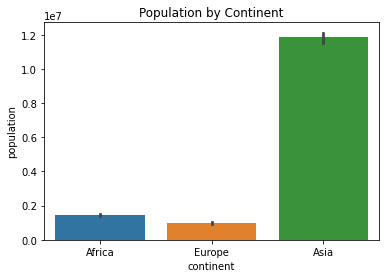

In [17]:
#Visualizing population size of each continent

sb.barplot(x="continent", y="population", data=df)
plt.title('Population by Continent');

Asia has the largest population followed by Africa and then Europe with the least

NUMBER OF COUNTRIES PER CONTINENT

In [93]:
#Number of Countries per continent
i=eval(input('Continent(0 is Africa, 1 is Europe, 2 is Asia):  '))

print( df.groupby('continent')['country_name'].get_group(continents[i]).unique())
print(continents[i],'has',len(df.groupby('continent')['country_name'].get_group(continents[i]).unique()),'countries')

Continent(0 is Africa, 1 is Europe, 2 is Asia):  2
['Country 24' 'Country 25' 'Country 26' 'Country 27' 'Country 28'
 'Country 29' 'Country 30' 'Country 31' 'Country 32' 'Country 33'
 'Country 34' 'Country 35']
Asia has 12 countries


NUMBER OF CITIES PER CONTINENT

In [94]:
#Number of cities per continent
i=eval(input('Continent(0 is Africa, 1 is Europe, 2 is Asia):  '))

#print( df.groupby('continent')['city_name'].get_group(continents[i]))
print(continents[i],'has',len(df.groupby('continent')['country_name'].get_group(continents[i])),'cities')

Continent(0 is Africa, 1 is Europe, 2 is Asia):  2
Asia has 133 cities


NUMBER OF CITIES PER COUNTRY

In [106]:
#Number of cities per country
num=eval(input('Country:'))

print( df.groupby('country_name')['city_name'].get_group('Country '+ str(num)))
print('Country '+ str(num),'has',len(df.groupby('country_name')['city_name'].get_group('Country '+str(num))),'cities')

Country:26
95      City 0
96      City 1
97      City 2
98      City 3
99      City 4
100     City 5
101     City 6
102     City 7
103     City 8
104     City 9
105    City 10
106    City 11
107    City 12
108    City 13
109    City 14
110    City 15
111    City 16
112    City 17
113    City 18
Name: city_name, dtype: object
Country 26 has 19 cities


POPULATION PER CITY and TOTAL POPULATION 

In [105]:
#population per city in that country and total population per country
my_country=eval(input("Country id: "))
for country_no in list(range(40)):
    if country_no==my_country:
        cities_pop=list(enumerate(df.groupby('country_name')['population'].get_group('Country '+str(country_no))))
        dataframe=df.groupby('country_name')['population'].get_group('Country '+str(country_no)).sum()
print(cities_pop)
print('Total Population =',dataframe)
        

Country id: 26
[(0, 14910448), (1, 12750822), (2, 13151503), (3, 10871967), (4, 12370379), (5, 13195176), (6, 9579043), (7, 12180479), (8, 12393020), (9, 7139641), (10, 11382458), (11, 12816540), (12, 10168140), (13, 14347715), (14, 12302169), (15, 9404988), (16, 12393981), (17, 16086202), (18, 11801723)]
Total Population = 229246394


CREATING A PIVOT TABLE

In [355]:
#Creating a pivot table for countries population per continent
pd.pivot_table(df,values='population',columns=['continent'],index=['country_name'],aggfunc=sum)

continent,Africa,Asia,Europe
country_name,,,
Country 0,940371.0,NaN,NaN
Country 1,5502101.0,NaN,NaN
Country 10,6820589.0,NaN,NaN
Country 11,2344167.0,NaN,NaN
Country 12,1698172.0,NaN,NaN
Country 13,6865945.0,NaN,NaN
Country 14,1330149.0,NaN,NaN
Country 15,2819378.0,NaN,NaN
Country 16,4572219.0,NaN,NaN


# BASIC VISUALIZATIONS

A BARCHART FOR CITIES POPULATION IN EACH CONTINENT

Continent(0 is Africa, 1 is Europe, 2 is Asia):1


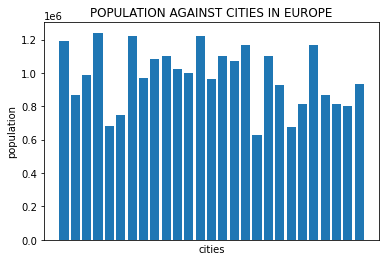

In [56]:
continents=list(df['continent'].unique())
continents
i=eval(input('Continent(0 is Africa, 1 is Europe, 2 is Asia):'))
for cont in list(range(3)):
    if cont==i:
        cities_by_continent=df.groupby('continent')['population'].get_group(continents[i])
        #print(countries_by_continent)

x=cities_by_continent.index.tolist()
y=cities_by_continent.values.tolist()
plt.xticks(labels=x, ticks=np.arange(len(x)))
plt.xlabel('cities')
plt.ylabel('population')
plt.title('POPULATION AGAINST CITIES IN '+continents[i].upper())
plt.bar(x,y);


A BARCHART FOR CITIES POPULATION IN EACH COUNTRY

Country:24
79    City 0
80    City 1
81    City 2
82    City 3
83    City 4
84    City 5
Name: city_name, dtype: object


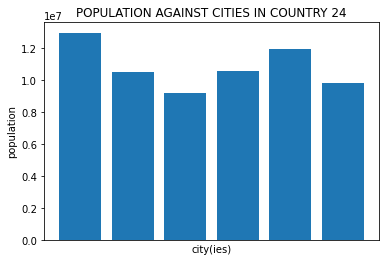

In [59]:
#plotting population against each city of a particular country


num=eval(input('Country:'))
mycities=list(range(len(df.groupby('country_name')['city_name'].get_group('Country '+ str(num)))))
mycities
print( df.groupby('country_name')['city_name'].get_group('Country '+ str(num)));
cities_by_countries=df.groupby('country_name')['population'].get_group('Country '+str(num))
x=cities_by_countries.index.tolist()
y=cities_by_countries.values.tolist()
plt.xticks(label=x,ticks=mycities)
plt.xlabel('city(ies)')
plt.ylabel('population')
plt.title('POPULATION AGAINST CITIES IN '+'COUNTRY '+ str(num))
plt.bar(x,y);


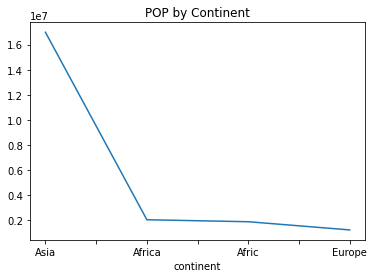

In [7]:
#total population per continent
df.groupby('continent').max()['population'].sort_values(ascending=False).plot()
plt.title('POP by Continent');


POPULATION DISTRIBUTION of Continents

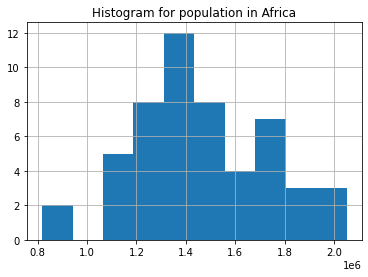

In [8]:
#Histogram for Africa
df.groupby('continent')['population'].get_group('Africa').hist()
plt.title('Histogram for population in Africa');

In [72]:
df.groupby('continent')['population'].get_group('Africa').min()

817970

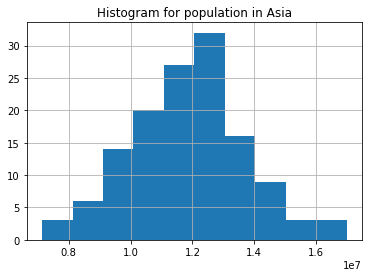

In [9]:
#Histogram for Asia
df.groupby('continent')['population'].get_group('Asia').hist()
plt.title('Histogram for population in Asia');

In [74]:
df.groupby('continent')['population'].get_group('Asia').max()

16985241

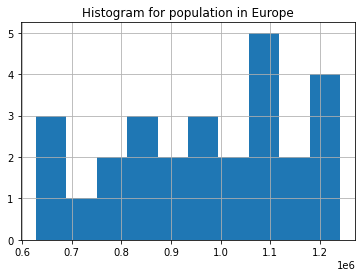

In [10]:
#Histogram for Europe
df.groupby('continent')['population'].get_group('Europe').hist()
plt.title('Histogram for population in Europe');

In [76]:
df.groupby('continent')['population'].get_group('Europe').max()

1240743

BOXPLOT FOR CONTINENTS

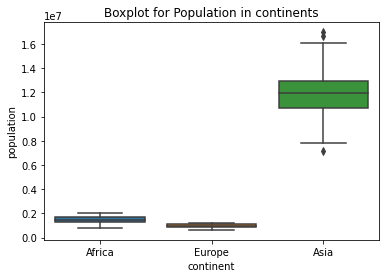

In [80]:
#boxplot for each continents population
sb.boxplot(y='population', x='continent', orient='v',data=df);
plt.title('Boxplot for Population in continents');

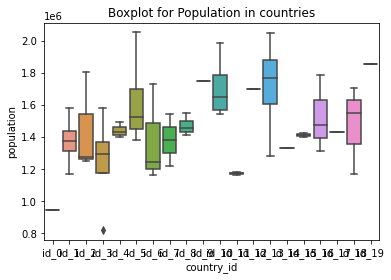

In [13]:
#boxplot for each countries population
sb.boxplot(y='population', x='country_id', orient='v',data=df[:50]);
plt.title('Boxplot for Population in countries');

VIOLIN PLOT FOR POPULATION

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


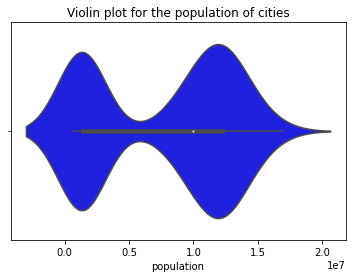

In [81]:
#A violin plot for the population of cities

sb.violinplot(df['population'], orient='h', color='blue');
plt.title('Violin plot for the population of cities');

HUE SEMANTIC

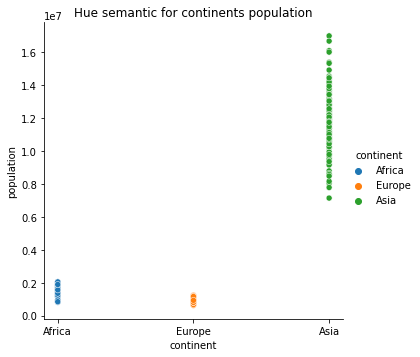

In [83]:
#Hue semantic for continents population
sb.relplot(x="continent", y="population", hue="continent",data=df);
plt.title('Hue semantic for continents population');

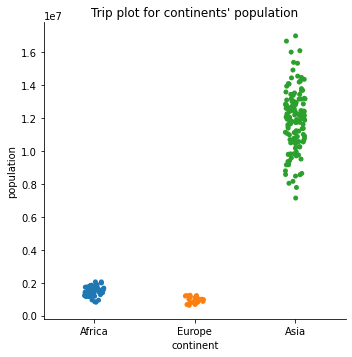

In [86]:
#trip
sb.catplot(x="continent", y="population", kind='strip',data=df);
plt.title('''Trip plot for continents' population''');

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


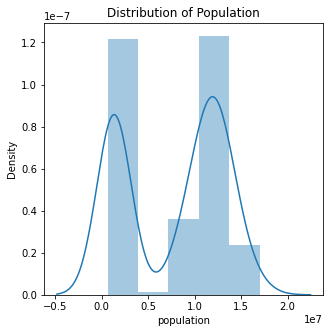

In [87]:
# distribution of population
plt.figure(figsize=(5,5))
sb.distplot(df['population']);
plt.title('Distribution of Population');

# WORKING WITH SQL

CREATING A DATABASE OF COUNTRIES AND THEIR RESPECTIVE CONTINENTS

# table cont_countries

In [4]:
#setting up connection with your sql

conn=psy.connect("dbname='postgres' user='postgres' host='localhost' password='admin'")
cur=conn.cursor()


In [81]:
conn.reset()

In [83]:
cur.execute('''create table cont_countries(
continent varchar(6),
	country_name varchar(12),
	country_id varchar(6)
	
)''')


DuplicateTable: relation "cont_countries" already exists


In [84]:
code='''
INSERT INTO cont_countries(continent,country_name,country_id) 
VALUES(%s,%s,%s)
'''


def inserting_to_cont_countries_pop(s):
    continent=s.continent
    country_name=s.country_name
    country_id=s.country_id
    cols=(continent,country_name,country_id)
    
    cur.execute(code,cols)
    
for row_no,row in df.iterrows():
    inserting_to_cont_countries_pop(row)

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


In [85]:
conn.commit()

In [23]:
cur.execute('''select continent,country_name from cont_countries where country_name='Country 22'
''')
cur.fetchall()

[('Europe', 'Country 22'),
 ('Europe', 'Country 22'),
 ('Europe', 'Country 22'),
 ('Europe', 'Country 22'),
 ('Europe', 'Country 22'),
 ('Europe', 'Country 22'),
 ('Europe', 'Country 22')]

# table count_city

In [76]:
cur.execute('''create table count_city(
country_name varchar(12),
	city_name varchar(8),
	city_id varchar(6)
)
''')

In [77]:
code='''
INSERT INTO count_city(country_name,city_name,city_id) 
VALUES(%s,%s,%s)
'''


def inserting_to_count_city(s):
    country_name=s.country_name
    city_name=s.city_name
    city_id=s.city_id
    cols=(country_name,city_name,city_id)
    
    cur.execute(code,cols)
    
for row_no,row in df.iterrows():
    inserting_to_count_city(row)

In [79]:
conn.commit()

In [80]:
cur.execute('''select * from count_city where country_name='Country 1'
''')
cur.fetchall()

[('Country 1', 'City 0', 'cid0'),
 ('Country 1', 'City 1', 'cid1'),
 ('Country 1', 'City 2', 'cid2'),
 ('Country 1', 'City 3', 'cid3')]

# table city_population

In [87]:
cur.execute('''CREATE TABLE city_population(
city_name varchar(8),	
city_id varchar(6),
population bigint
)''')


In [88]:
code='''
INSERT INTO city_population(city_name,city_id,population) 
VALUES(%s,%s,%s)
'''


def inserting_to_city_pop(s):
    city_name=s.city_name
    city_id=s.city_id
    population=s.population
    cols=(city_name,city_id,population)
    
    cur.execute(code,cols)
    
for row_no,row in df.iterrows():
    inserting_to_city_pop(row)


In [86]:
conn.reset()

In [89]:
conn.commit()

In [90]:
cur.execute('''select * from city_population
''')
cur.fetchmany(5)

[('City 0', 'cid0', 940371),
 ('City 0', 'cid0', 1170319),
 ('City 1', 'cid1', 1580651),
 ('City 2', 'cid2', 1360412),
 ('City 3', 'cid3', 1390719)]

JOINING TABLES

In [30]:
cur.execute('''SELECT * FROM cont_countries,count_city,city_population where cont_countries.country_name=count_city.country_name
and count_city.city_name=city_population.city_name
''')
cur.fetchmany(1)

[('Asia',
  'Country 25',
  'id_25',
  'Country 25',
  'City 0',
  'cid0',
  'City 0',
  'cid0',
  940371)]

In [ ]:
#Filling the NaN with median 
md=mydf['Historical_Population'].median()
mydf['Historical_Population'].fillna(md,inplace=True)